<a href="https://colab.research.google.com/github/Fpacheco92/Tareas/blob/main/Tarea11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se pide modificar el codigo predictor corrector para que de p iteraciones en la correccion (Adams Moulton) a partir de una primera prediccion (Adams-Bashforth)

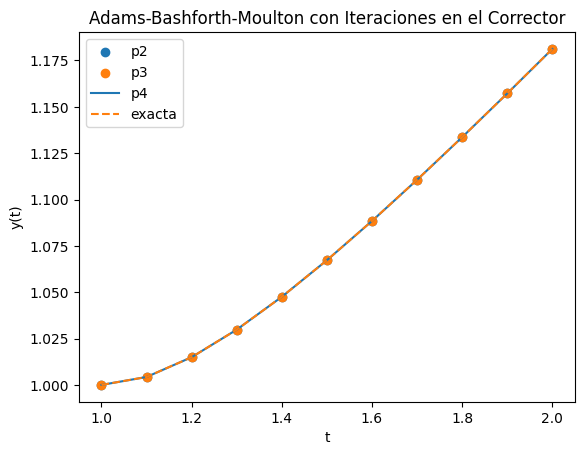

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función f(t, y)
def f(t, y):
    return  (y/t) - (y/t)**2


#codigo corrector predictor tomado de las notas de clase

def rk4_step(f, fi, t, w, h):
    k1 = h*fi
    k2 = h*f(t+h/2, w+k1/2)
    k3 = h*f(t+h/2, w+k2/2)
    k4 = h*f(t + h, w + k3)
    return (k1 + 2*k2 + 2*k3 + k4)/6

def apc4(f, a, b, yo, N,p):

    h = (b-a)/N
    i = 0
    w = yo
    t = a

    ws = np.zeros(N+1)
    ts = np.zeros(N+1)
    fi = 0
    fim1 = 0
    fim2 = 0
    fim3 = 0

    for i in range(N):
        ts[i] = t
        ws[i] = w
        fim3 = fim2
        fim2 = fim1
        fim1 = fi
        fi = f(t,w)
        if i < 3:
            w += rk4_step(f, fi, t, w, h)
        else:
            # Predictor Adams-Bashforth de 4 pasos
            w = ws[i] + h*(55*fi - 59*fim1 +37*fim2 - 9*fim3)/24
            # Corrector Adams-Moulton de 3 pasos
            for j in range(p): #Modificacion al código
              w = ws[i] + h*(9*f(t + h, w) + 19*fi - 5*fim1 + fim2)/24

        t += h

    ws[N] = w
    ts[N] = t

    return ts, ws

#Solucion Analítica
exacta = ts/(1+np.log(ts))

# soluciones para distintos p #2-4
ts, p2= apc4(f,1,2,1,10,2)
ts, p3= apc4(f,1,2,1,10,3)
ts, p4= apc4(f,1,2,1,10,4)

# Grafico algoritmo predictor corrector para diferentes p
plt.scatter(ts,p2,label='p2')
plt.scatter(ts, p3,label='p3')
plt.plot(ts, p4,label='p4')
plt.plot(ts, exacta,label='exacta', linestyle='--')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Adams-Bashforth-Moulton con Iteraciones en el Corrector')
plt.legend()
plt.show()



No es visible desde la grafica que curva ajusta mejor, procedere a graficar los errores. Ya que los valores obtenidos son muy cercanos, los errores tambien lo seran, por lo cual para poder comparar mejor, graficare las diferencias entre los errores de cada una.

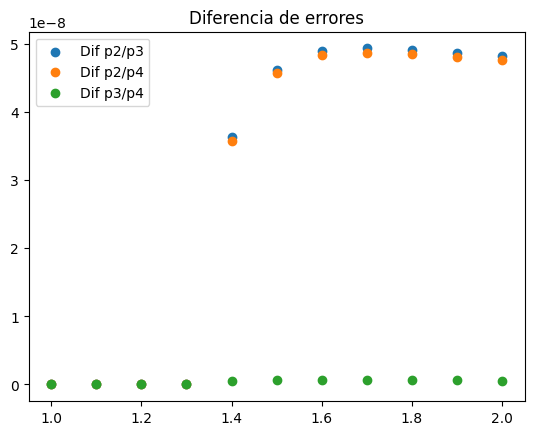

In [120]:
diferenciap2p3 = np.abs((p2 - exacta)  - (p3 - exacta) )
diferenciap2p4 = np.abs((p2 - exacta)  - (p4 - exacta) )
diferenciap3p4 = np.abs((p3 - exacta)  - (p4 - exacta) )

plt.scatter(ts, diferenciap2p3, label='Dif p2/p3')
plt.scatter(ts, diferenciap2p4, label='Dif p2/p4')
plt.scatter(ts, diferenciap3p4, label='Dif p3/p4')
plt.title('Diferencia de errores')
plt.legend()
plt.show()

Aquí ya se puede discriminar mejor, en tanto a p3/p4 no hay casi diferencia por lo que se puede concluir que no es optimo pasar de p=3 (almenos para esta funcion)

Notar que en el intervalo (1-1.3) p2, p3 y p4
toman valores practicamente iguales.


 En cuanto a las diferencias p2/p4 y p2/p3 se observa que p2/p3 es ligeramente mayor y por ende p=3 es una mejor aproximacion para este caso.

  

# Calificación: 7.0